# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [371]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import stats
from numpy.random import seed
from scipy.stats import norm
from scipy.stats import ttest_1samp
medical = pd.read_csv('data/insurance2.csv')


In [46]:
medical.shape

(1338, 8)

In [47]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram plot of the distribution of charges is not distributed normally. Since the distribution is skewed, we will need a large sample size for the distribution to approximate a normal distribution and thereby prove the central limit theorem. 
MEAN
Once we get a large sample size, the sample mean will be equal to the population mean. 
STANDARD DEVIATION (SD)
The SD of the  population distribution is estimated with the SD of the sample size. The SD of the sample size is a good approximation for the SD of the population because we have a large sample. The standard deviation of our sampling distribution is equal to the sample standard deviation divided by the square root of the sample size.
The mean is : 13270.422265
The SD is: 12110.011237

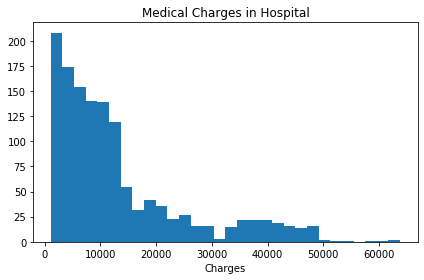

In [88]:
charges =medical['charges']
plt.hist (charges,bins=(30))
_ = plt.xlabel('Charges')
_ = plt.title('Medical Charges in Hospital')
_= plt.tight_layout()

In [218]:
a=charges.describe()
a

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 

On the assumption that the average charges represent 
a. a random sample of charges, 
b. a large enough sample size, and 
c. individual charges that are independent of each other. 

A hypothesis testing of the mean using a t-statistics can then be carried out to see if the charges of $12000 fall within the confidence interval dictated for the hypothesis testing.  The null hypothesis is defined as there is no change in the mean of the charges. The alternative hypothesis is defined as the mean charges fall below $12000 

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ 

I would do a one sided interval test. This is because I am trying to test whether the the actual average charge has fallen below a certain value. The administrator's concern is directional. I will then see whether the charge of $12000 falls above or below the critical value.

The critical value for t-statistics for 95 % confidence of a one tailed test is 1.64
We are confident that the mean value lies above  $12725 95% of the time.

Since the value $12725 lies above the charge $12000,the administrator should not be concerned.The hospitals operator model is not threatened

The critical value for t-statistics for 95 % confidence of a one tailed test is displayed with the dotted line in the histogram below. 

In [378]:
p=0.05
n=medical.shape[0]
df = medical.shape[0]-1 # sample size -1
tset, pval = ttest_1samp(charges, 12000)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" Reject the null hypothesis")
else:
  print("Accept null hypothesis")

t_critical = t.ppf(p,df)
print("The critical t value for 95% confidence interval is: {} ".format(t_critical))

p-values 0.000130171652092872
 we are rejecting null hypothesis
The critical t value for 95% confidence interval is: -1.6459941145571324 


In [380]:
x_bar =charges.mean()
sigma = charges.std()
standard_error = sigma/np.sqrt(n)
standard_error

331.06745431568226

In [389]:
CI_lower = x_bar + t_critical * standard_error

In [390]:
CI_lower

12725.48718381623

In [239]:
n_sample =5000
df_sample =medical.loc[np.random.choice(charges.index,n_sample)]

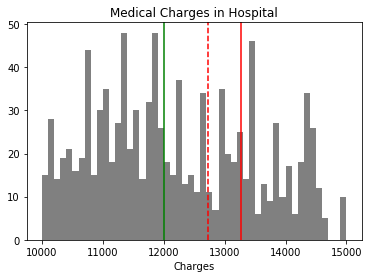

In [445]:
_ = plt.hist(df_sample.charges, bins=50,align='mid',facecolor='gray',range=[10000, 15000])
_ = plt.xlabel('Charges')
_ = plt.title('Medical Charges in Hospital')
_ = plt.axvline(13270, color='r')
_ = plt.axvline(12000, color='g')
_ = plt.axvline(12725, color='r', linestyle='--')


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__H0: Is the mean of the charges the same for people with insurance and people without insurance
      H1: Is the mean of the charges different for people with insurance and people without insurance

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [428]:
#Manual approach to calculate t_critical
#tcritical = 11.901306943555385
sp=np.sqrt(((783-1)*(medcharge_std**2)+(555-1)*(mednocharge_std**2))/(783+555-2))
t_critical=(medcharge_mean-mednocharge_mean)/((sp)*np.sqrt((1/783)+(1/555)))
                                                                    
t_critical

11.901306943555385

In [410]:
medcharge=medical.loc[lambda df: df['insuranceclaim'] == 1, :]
medcharge_mean = np.mean(medcharge["charges"])
medcharge_std=np.std(medcharge["charges"])
medcharge.info()

In [413]:
mednocharge=medical.loc[lambda df: df['insuranceclaim'] == 0, :]
mednocharge_mean = np.mean(mednocharge["charges"])
mednocharge_std=np.std(mednocharge["charges"])
mednocharge.info()

In [418]:
#Calculation using scipy.stats to calculate ttest
#tcritical = 11.901306943555387 pvalue = 4.090550214373679e-31
stats.ttest_ind_from_stats(medcharge_mean, medcharge_std, 783 , mednocharge_mean, mednocharge_std, 555, equal_var=True)

Ttest_indResult(statistic=11.901306943555387, pvalue=4.090550214373679e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=False)
This is a Welch’s t-test, since it does not assume equal population variance

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no statistical function for z test in scipy.stats. However, I did find a function in the statsmodel, it is
statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test